In [1]:
from glob import glob
import matplotlib.pyplot as plt
import numpy as np

from caiman_main import SimulateAcq
from utils import tic, toc, ptoc, remove_artifacts, mm3d_to_img 

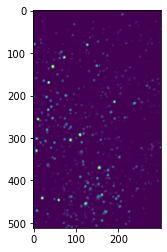

In [2]:
# make a structural image
# can do however you want, just needs to be an image that matches the X dims in image_params (100,400)

mm3d_file = glob('E:/caiman_scratch/template/*.mat')[0]
mm3d_img = mm3d_to_img(mm3d_file, chan=0)

# below should work on any image
structural_image = remove_artifacts(mm3d_img, 100, 400)
structural_image = structural_image[0,:,:] # select for only top plane in image

plt.imshow(structural_image)

In [3]:
dxy = (1.5, 1.5) # spatial resolution in x and y in (um per pixel)
max_shift_um = (12., 12.) # maximum shift in um
patch_motion_xy = (25., 25.) # patch size for non-rigid correction in um

image_params = {
    'channels': 2,
    'planes': 3,
    'x_start': 100,
    'x_end': 400,
    'folder': 'E:/caiman_scratch/ori/', # this is where the tiffs are
    'chunk_size': 10, # number of tiffs to do at once
    'structural_img': structural_image
}

caiman_params = {
    'fr': 6,  # imaging rate in frames per second, per plane
    'overlaps': (24, 24),
    'max_deviation_rigid': 3,
    'p': 1,  # deconv 0 is off, 1 is slow, 2 is fast
    'nb': 3,  # background compenents -> nb: 3 for complex
    'decay_time': 1.0,  # sensor tau
    'gSig': (7, 7),  # expected half size of neurons in pixels, very important for proper component detection
    'only_init': False,  # has to be `False` when seeded CNMF is used
    'rf': None,  # half-size of the patches in pixels. Should be `None` when seeded CNMF is used.
    'pw_rigid': True,  # piece-wise rigid flag
    'ssub': 1,
    'tsub': 1,
    'merge_thr': 0.99,
    'num_frames_split': 20,
    'border_nan': 'copy',
    'max_shifts': [int(a/b) for a, b in zip(max_shift_um, dxy)],
    'strides': tuple([int(a/b) for a, b in zip(patch_motion_xy, dxy)])
}

In [4]:
expt = SimulateAcq(caiman_params, **image_params)
expt.run_fake_expt()

Starting segmentation on a provided template...
done in 0.5715 s
Setting up caiman...
Starting local cluster...done.
Removed E:/caiman_scratch/ori\MAP0_d1_512_d2_300_d3_1_order_C_frames_886_.mmap
Removed E:/caiman_scratch/ori/out\caiman_data_0.hdf5
Removed E:/caiman_scratch/ori/out\data_out_0.json
Memory mapping current file...done. Took 3.0448s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 17.5405s
Memory mapping current file...done. Took 3.1501s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 7.7435s
Memory mapping current file...done. Took 3.1044s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 7.6171s
Memory mapping current file...done. Took 3.1860s
Starting motion correction and CNMF...
spatial support for each components given by the user
CNMF fitting done. Took 7.6528s
Memo